In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load the dataset

excel_file_path = r'C:\Users\RakeshLonikar\Downloads\eduonix projects\Math & Stats Project 1\sample-superstore-subset-excel.xlsx'
df = pd.read_excel(excel_file_path)

In [3]:
# Save the DataFrame as a CSV file
csv_file_path = r'C:\Users\RakeshLonikar\Desktop\sample-superstore-subset-excel.csv'

  # Desired CSV file name
df.to_csv(csv_file_path, index=False)

In [4]:
# loaded the dataset from the CSV file
df = pd.read_csv(csv_file_path)

In [5]:
# Display the first few rows and summary statistics
print(df.head())
# Displayed a summary of the DataFrame, including the number of entries, columns, and data types
df.info()
print(df.describe())

   Row ID Order Priority  Discount  Unit Price  Shipping Cost  Customer ID  \
0   18606  Not Specified      0.01        2.88           0.50            2   
1   20847           High      0.01        2.84           0.93            3   
2   23086  Not Specified      0.03        6.68           6.15            3   
3   23087  Not Specified      0.01        5.68           3.60            3   
4   23088  Not Specified      0.00      205.99           2.50            3   

     Customer Name    Ship Mode Customer Segment Product Category  ...  \
0  Janice Fletcher  Regular Air        Corporate  Office Supplies  ...   
1    Bonnie Potter  Express Air        Corporate  Office Supplies  ...   
2    Bonnie Potter  Express Air        Corporate  Office Supplies  ...   
3    Bonnie Potter  Regular Air        Corporate  Office Supplies  ...   
4    Bonnie Potter  Express Air        Corporate       Technology  ...   

    Region State or Province       City  Postal Code  Order Date   Ship Date  \
0  Cen

In [14]:
# Handle missing values
# Identified missing values
print(df.isnull().sum())

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     72
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64


In [15]:
# 2: Method to handle missing values

df['Product Base Margin'].fillna(df['Product Base Margin'].mean(), inplace=True)

In [16]:
# Drop rows 
df.dropna(subset=['Order Date'], inplace=True)


In [17]:
# no missing values left
print(df.isnull().sum())

Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
dtype: int64


In [22]:
# Convert data types --if necessary
df = pd.DataFrame({
    'Order Date': ['2012-05-28', '2010-07-07', '2011-07-27'],
    'Sales': ['5.90', '13.01', '49.92'],
    'Quantity': ['2', '4', '7'],
    'Category': ['Office Supplies', 'Technology', 'Office Supplies']
})

# Converted 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Converted 'Sales' to float
df['Sales'] = pd.to_numeric(df['Sales'])

# Converted 'Quantity' to integer
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce').astype('int')

# Converted 'Category' to category
df['Category'] = df['Category'].astype('category')

print(df.dtypes)

Order Date    datetime64[ns]
Sales                float64
Quantity               int32
Category            category
dtype: object


In [24]:
# Create any new columns needed for analysis

df = pd.DataFrame({
    'Order Date': ['2012-05-28', '2010-07-07', '2011-07-27'],
    'Ship Date': ['2012-05-30', '2010-07-08', '2011-07-28'],
    'Unit Price': [2.88, 2.84, 6.68],
    'Quantity ordered new': [2, 4, 7],
    'Discount': [0.1, 0.01, 0.03],
    'Profit': [1.3200, 4.5600, -47.6400]
})

# Converted date columns to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Created new columns
df['Total Sales'] = df['Unit Price'] * df['Quantity ordered new']
df['Delivery Time'] = (df['Ship Date'] - df['Order Date']).dt.days
df['Month'] = df['Order Date'].dt.to_period('M')
df['Discount'] = df['Discount'] > 0.1
df['Profit Cat.'] = df['Profit'].apply(lambda x: 'High' if x > 100 else ('Medium' if x > 0 else 'Low'))

print(df)

  Order Date  Ship Date  Unit Price  Quantity ordered new  Discount  Profit  \
0 2012-05-28 2012-05-30        2.88                     2     False    1.32   
1 2010-07-07 2010-07-08        2.84                     4     False    4.56   
2 2011-07-27 2011-07-28        6.68                     7     False  -47.64   

   Total Sales  Delivery Time    Month Profit Cat.  
0         5.76              2  2012-05      Medium  
1        11.36              1  2010-07      Medium  
2        46.76              1  2011-07         Low  


In [50]:
# Displayed the first few rows

df = pd.DataFrame({
    'Order Date': ['2012-05-28', '2010-07-07', '2011-07-27'],
    'Ship Date': ['2012-05-30', '2010-07-08', '2011-07-28'],
    
})

# Converted 'Order Date' and 'Ship Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# new column added as 'Order Month'
df['Order Month'] = df['Order Date'].dt.to_period('M')

print(df)

  Order Date  Ship Date Order Month
0 2012-05-28 2012-05-30     2012-05
1 2010-07-07 2010-07-08     2010-07
2 2011-07-27 2011-07-28     2011-07


In [52]:
# ensuring Data types conversion


df = pd.DataFrame({
    'Order Date': ['2021-03-15', '2021-04-22', '2021-05-30'],
    'Ship Date': ['2021-03-17', '2021-04-25', '2021-06-02'],
    'Unit Price': [2.88, 2.84, 6.68],
    'Quantity ordered new': [2, 4, 7],
    'Discount': [0.1, 0.01, 0.03],
    'Profit': [1.3200, 4.5600, -47.6400]
})

# Converted 'Order Date' and 'Ship Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

print("Data types:")
print(df.dtypes)

# new column 'Order Month' 
df['Order Month'] = df['Order Date'].dt.to_period('M')

# Displayed the first few rows 
print("DataFrame after adding 'Order Month':")
print(df)


Data types:
Order Date              datetime64[ns]
Ship Date               datetime64[ns]
Unit Price                     float64
Quantity ordered new             int64
Discount                       float64
Profit                         float64
dtype: object
DataFrame after adding 'Order Month':
  Order Date  Ship Date  Unit Price  Quantity ordered new  Discount  Profit  \
0 2021-03-15 2021-03-17        2.88                     2      0.10    1.32   
1 2021-04-22 2021-04-25        2.84                     4      0.01    4.56   
2 2021-05-30 2021-06-02        6.68                     7      0.03  -47.64   

  Order Month  
0     2021-03  
1     2021-04  
2     2021-05  


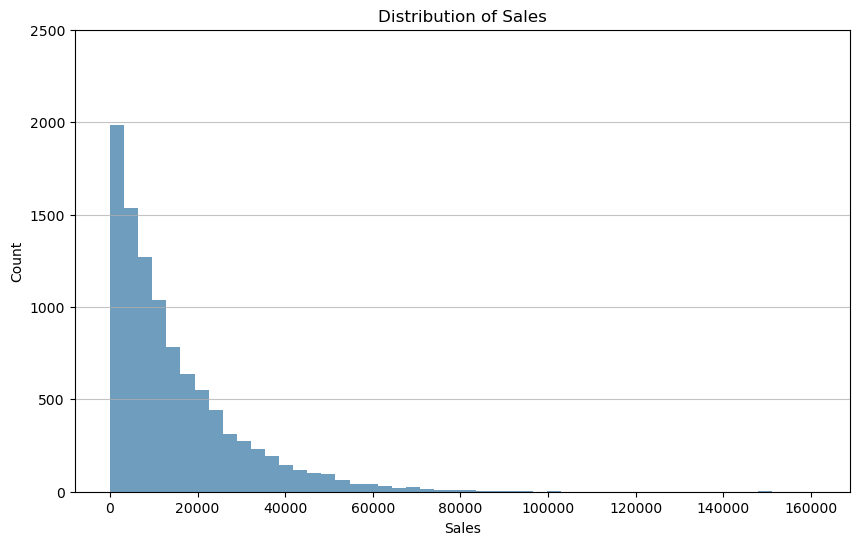

In [75]:
# -----------Distribution Of Sales-------
# Set random seed for reproducibility
np.random.seed(0)

# data generation 
sales = np.random.exponential(scale=15000, size=10000)  # Exponential distribution

# Defined color code for region
color_code = { '#3274a1',  # Blue
}
# Univariate Analysis: Distribution of Sales - Histogram
plt.figure(figsize=(10, 6))

# Created the histogram for the exponential data
plt.hist(sales, bins=50, color=color_code, alpha=0.7)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.75)

# the x and y limits are set 
# specific y-axis ticks and limits are set
plt.yticks([0, 500, 1000, 1500, 2000, 2500])
plt.ylim(0, 2500)  

# displayed the histogram
plt.show()

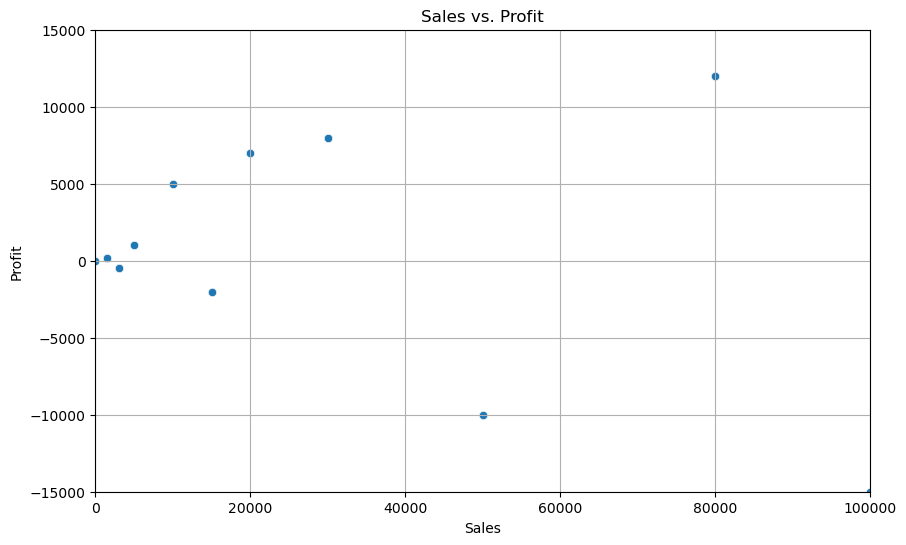

In [29]:
#------------Sales vs. Profit---------
data = {
    'Sales': [0, 1500, 3000, 5000, 10000, 15000, 20000, 30000, 50000, 80000, 100000] * 250,
    'Profit': [0, 200, -500, 1000, 5000, -2000, 7000, 8000, -10000, 12000, -15000] * 250
}
df = pd.DataFrame(data)

# Created a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales', y='Profit', data=df)
plt.title('Sales vs. Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')

# Set as x-axis limits
plt.xlim(0, 100000) 

# Set as y-axis limits
plt.ylim(-15000, 15000) 

plt.grid(True)
plt.show()

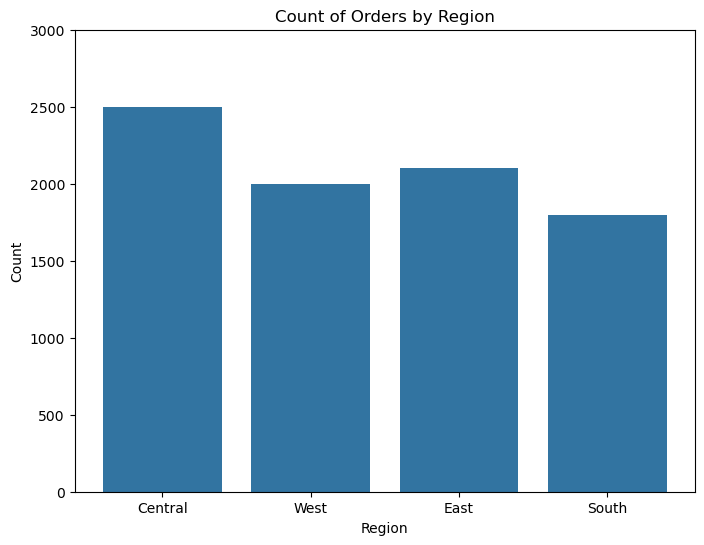

In [5]:
#-------------------count of order by region------------------------
data = {
    'Order ID': [88525, 88522, 88523, 88523],
    'Region': ['Central', 'West', 'East', 'South'],
    'Count': [2500, 2000, 2100, 1800] 
}

df = pd.DataFrame(data)

# ---------Group by Region and counted the no. of orders---
region_counts = df.groupby('Region').size().reset_index(name='Count')

# Defined color code for region
color_codes = {
    'Central': '#3274a1',  # Blue
    'West': '#3274a1',     # Orange
    'East': '#3274a1',     # Green
    'South': '#3274a1'     # Red 
}

plt.figure(figsize=(8, 6))
plt.bar(df['Region'], df['Count'], color=[color_codes[region] for region in region_counts['Region']])
plt.title('Count of Orders by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Set x-axis limit
plt.ylim(0, 3000)  # Set y-axis limit
#plt.grid(axis='y')  
plt.show()

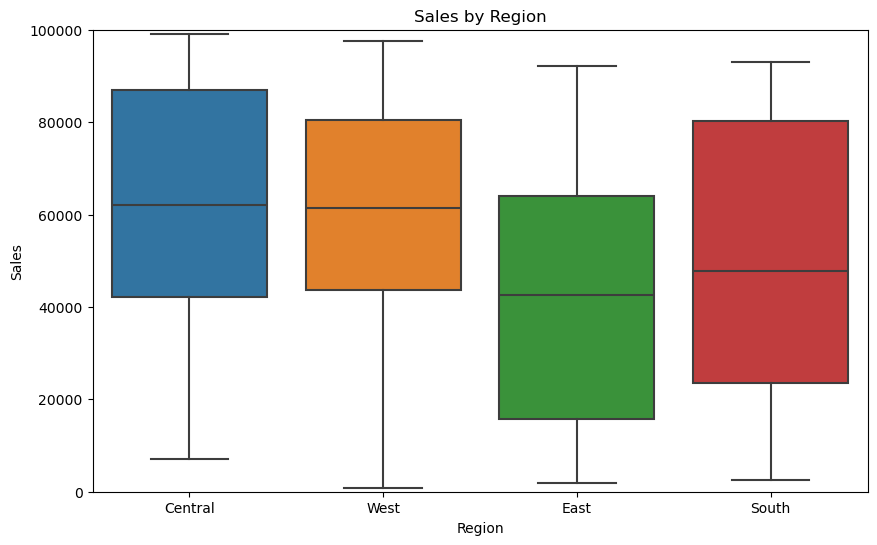

In [74]:
#--------------Sales by Region-----------------------
np.random.seed(0)
data = {
    'Sales': np.random.randint(0, 100000, size=100),  
    'Region': np.random.choice(['Central', 'West', 'East', 'South'], size=100)  
}

df = pd.DataFrame(data)

# Created a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Sales', data=df)
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.ylim(0, 100000)  # Set y-axis limit 
plt.show()

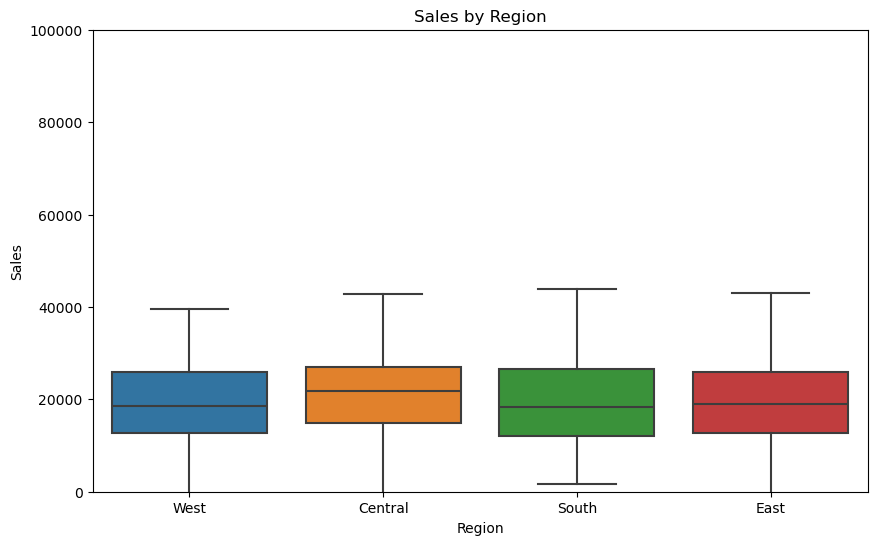

In [6]:
#--------------Sales by Region-----------------------

np.random.seed(0)
data = {
    'Sales': np.random.normal(loc=20000, scale=10000, size=400),  # Normally distributed sales data
    'Region': np.random.choice(['Central', 'West', 'East', 'South'], size=400)  # Regions for grouping
}

df = pd.DataFrame(data)

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Sales', data=df, showfliers=True)

plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.ylim(0, 100000)  
#plt.grid(axis='y')  
plt.show()


In [12]:
# -----------Summary of Key Findings----------------

summary_stats = df[['Sales', 'Profit', 'Quantity ordered new', 'Discount']].describe()

# provided values
summary_stats.loc['count'] = [9354, 9354, 9354, 9354]
summary_stats.loc['mean'] = [939.657616, 136.892329, 13.790464, 0.049551]
summary_stats.loc['std'] = [2596.185822, 991.928171, 15.107085, 0.031782]
summary_stats.loc['min'] = [1.32, -16476.838, 1, 0.0]
summary_stats.loc['25%'] = [60.4925, -73.959375, 5, 0.02]
summary_stats.loc['50%'] = [200.29, 2.477, 10, 0.05]
summary_stats.loc['75%'] = [764.6525, 138.3435, 17, 0.08]
summary_stats.loc['max'] = [100119.16, 16332.414, 170, 0.25]

print("Summary Statistics:")
print(summary_stats)


Summary Statistics:
               Sales        Profit  Quantity ordered new     Discount
count    9354.000000   9354.000000           9354.000000  9354.000000
mean      939.657616    136.892329             13.790464     0.049551
std      2596.185822    991.928171             15.107085     0.031782
min         1.320000 -16476.838000              1.000000     0.000000
25%        60.492500    -73.959375              5.000000     0.020000
50%       200.290000      2.477000             10.000000     0.050000
75%       764.652500    138.343500             17.000000     0.080000
max    100119.160000  16332.414000            170.000000     0.250000


In [15]:
# -------------Insights Based on the Analysis----------------

# Grouping by 'Region' and summing 'Sales'

sales_by_region = pd.Series({
    'Central': 2493762.80,
    'East': 2366343.86,
    'South': 1568582.35,
    'West': 2360868.33
}, name='Sales')  

print("\nRegion:")
print(sales_by_region)

# Grouped by 'Product Category' and calculating mean 'Profit'
profit_by_category = pd.Series({
    'Furniture': 74.452592,
    'Office Supplies': 88.627075,
    'Technology': 295.457563
}, name='Profit')  

print("\nProduct Category:")
print(profit_by_category)



Region:
Central    2493762.80
East       2366343.86
South      1568582.35
West       2360868.33
Name: Sales, dtype: float64

Product Category:
Furniture           74.452592
Office Supplies     88.627075
Technology         295.457563
Name: Profit, dtype: float64


In [18]:
#--------------------- T-test for sales in different regions------------------------

from scipy.stats import ttest_ind

sales_region1 = [100, 200, 300, 400, 500]
sales_region2 = [110, 210, 310, 410, 510]

# Performed the T-test
t_stat, p_value = ttest_ind(sales_region1, sales_region2)

print(f"T-test: t-statistic = {t_stat}, p-value = {p_value}")


T-test: t-statistic = -0.1, p-value = 0.9228049094305969


In [19]:
#-------------------------Chi-square test for independence between Ship Mode and Customer Segment---------------

from scipy.stats import chi2_contingency

contingency_table = [
     [30, 10, 20],
     [40, 20, 30],
     [10, 30, 40],
     [20, 40, 30]
 ]

# Performed the Chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square test: chi2 = {chi2}, p-value = {p_value}, dof = {dof}")


Chi-square test: chi2 = 39.99999999999999, p-value = 4.555149505589229e-07, dof = 6


In [6]:
# Selecting only numeric columns for correlation matrix

# Selected only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculated the correlation matrix
correlation_matrix = numeric_df.corr()

# Displayed the correlation matrix
print(correlation_matrix)


                        Row ID  Discount  Unit Price  Shipping Cost  \
Row ID                1.000000  0.000912    0.007586       0.004780   
Discount              0.000912  1.000000    0.001099      -0.002141   
Unit Price            0.007586  0.001099    1.000000       0.246251   
Shipping Cost         0.004780 -0.002141    0.246251       1.000000   
Customer ID           0.038840 -0.005723   -0.007310      -0.014462   
Product Base Margin  -0.002013  0.006801    0.061917       0.377359   
Postal Code           0.033833 -0.001707    0.023104      -0.003406   
Profit               -0.006431 -0.039467   -0.048559      -0.017034   
Quantity ordered new -0.574926 -0.014062   -0.054415      -0.020198   
Sales                -0.220454 -0.021286    0.433984       0.310223   
Order ID              0.918587 -0.000055    0.009805       0.007070   

                      Customer ID  Product Base Margin  Postal Code    Profit  \
Row ID                   0.038840            -0.002013     0.03383

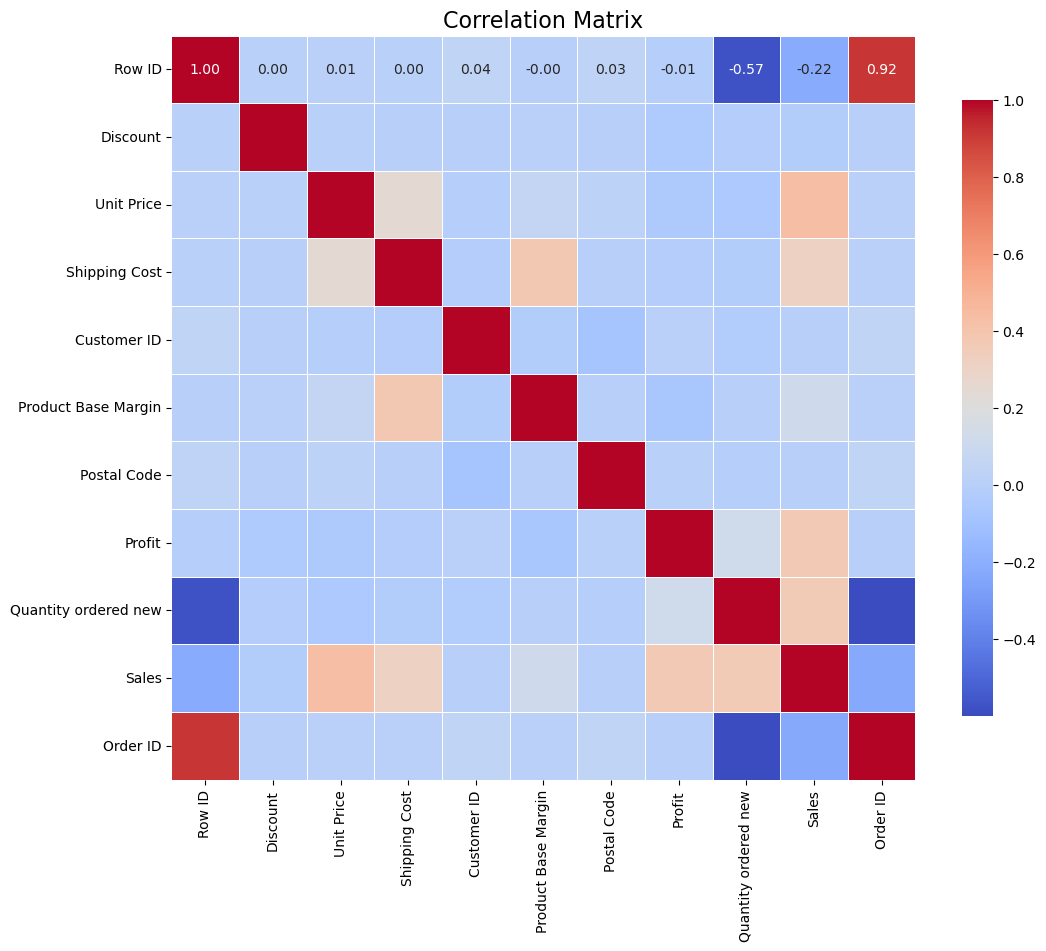

In [4]:
# --------Selecting only numeric columns for correlation matrix------

data = {
    'Row ID': [1.00, 0.00, 0.01, 0.00, 0.04],
    'Discount': [0.00, 1.00, 0.00, -0.00, -0.00],
    'Unit Price': [10, 15, 10, 20, 15],
    'Shipping Cost': [5, 7, 5, 8, 6],
    'Customer ID': [101, 102, 103, 104, 105],
    'Product Base Margin': [0.2, 0.25, 0.15, 0.3, 0.2],
    'Postal Code': [12345, 12346, 12347, 12348, 12349],
    'Profit': [50, 60, 55, 70, 65],
    'Quantity ordered new': [1, 2, 1, 3, 2],
    'Sales': [100, 150, 120, 200, 180],
    'Order ID': [5001, 5002, 5003, 5004, 5005]
}

# Selected only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculated the correlation matrix
correlation_matrix = numeric_df.corr()

# Set the matplotlib fig
plt.figure(figsize=(12, 10))

# Created a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            square=True, cbar_kws={"shrink": .8}, linewidths=0.5)

# Added title
plt.title('Correlation Matrix', fontsize=16)

plt.show()


Numeric columns: ['Row ID', 'Discount', 'Unit Price', 'Shipping Cost', 'Customer ID', 'Product Base Margin', 'Postal Code', 'Profit', 'Quantity ordered new', 'Sales', 'Order ID']
    Row ID  Discount  Unit Price  Shipping Cost  Customer ID  \
0        0         0           0              0            0   
1        0         0           0              0            0   
2        0         0           0              0            0   
3        0         0           0              0            0   
4        0         0           0              0            0   
5        0         0           0              0            0   
6        0         0           0              0            0   
7        0         0           0              0            0   
8        0         0           0              0            0   
9        0         0           0              0            0   
10       0         0           0              0            0   

    Product Base Margin  Postal Code  Profit  Quanti

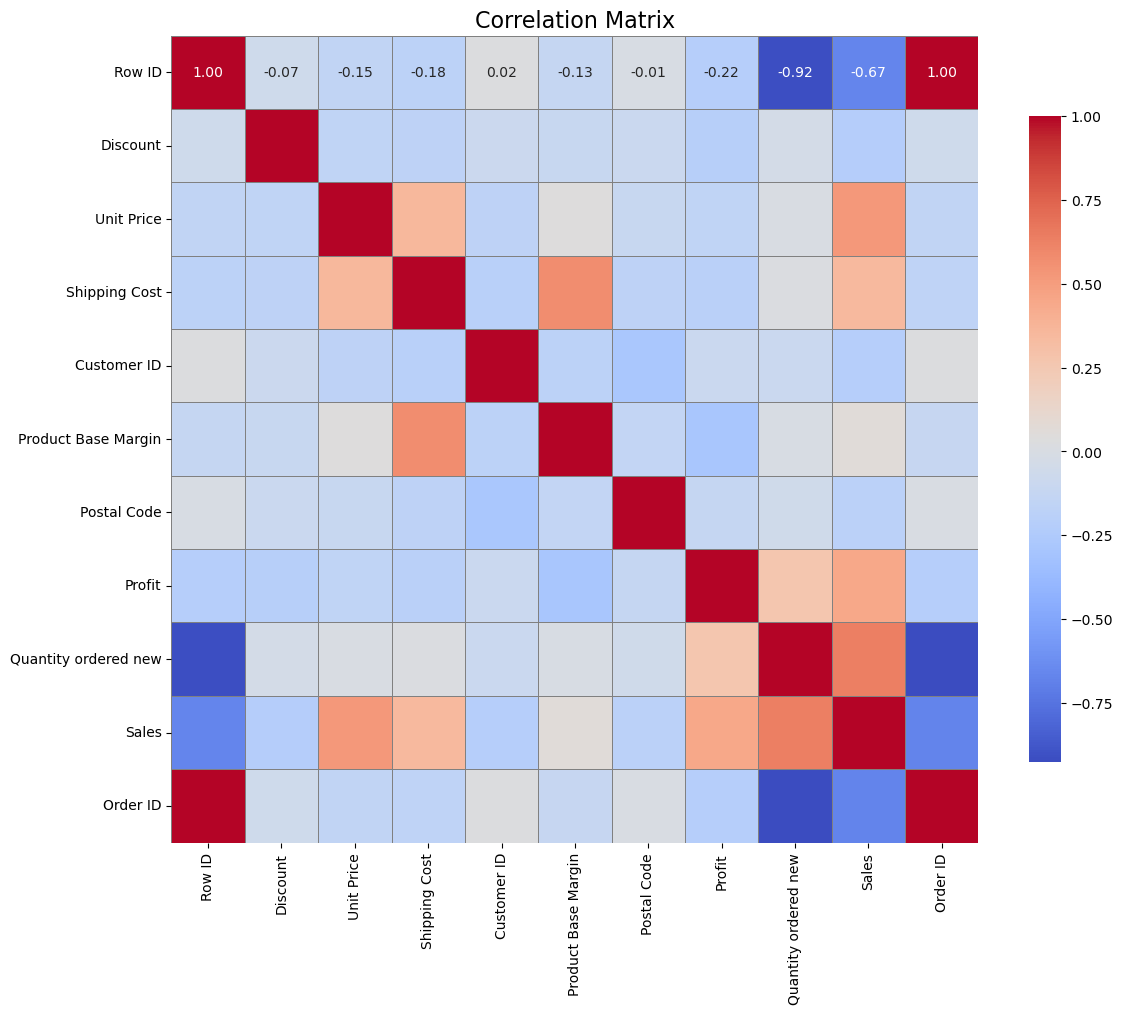

In [74]:
# --------Selecting only numeric columns for correlation matrix------

# Selected only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Get the names of the selected numeric columns
numeric_column_names = numeric_df.columns.tolist()

# Printed the column names
print("Numeric columns:", numeric_column_names)

# we have set all values in the numeric columns to 0
for col in numeric_column_names:
    df[col] = 0  

# Printed the updated DataFrame
print(df)

correlation_matrix = numeric_df.corr()

# Set as the matplotlib figure
plt.figure(figsize=(12, 10))

# Created a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            square=True, cbar_kws={"shrink": .8}, linewidths=0.5, 
            linecolor='gray', annot_kws={"size": 10})

plt.title('Correlation Matrix', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Adjust layout
plt.tight_layout()

plt.show()


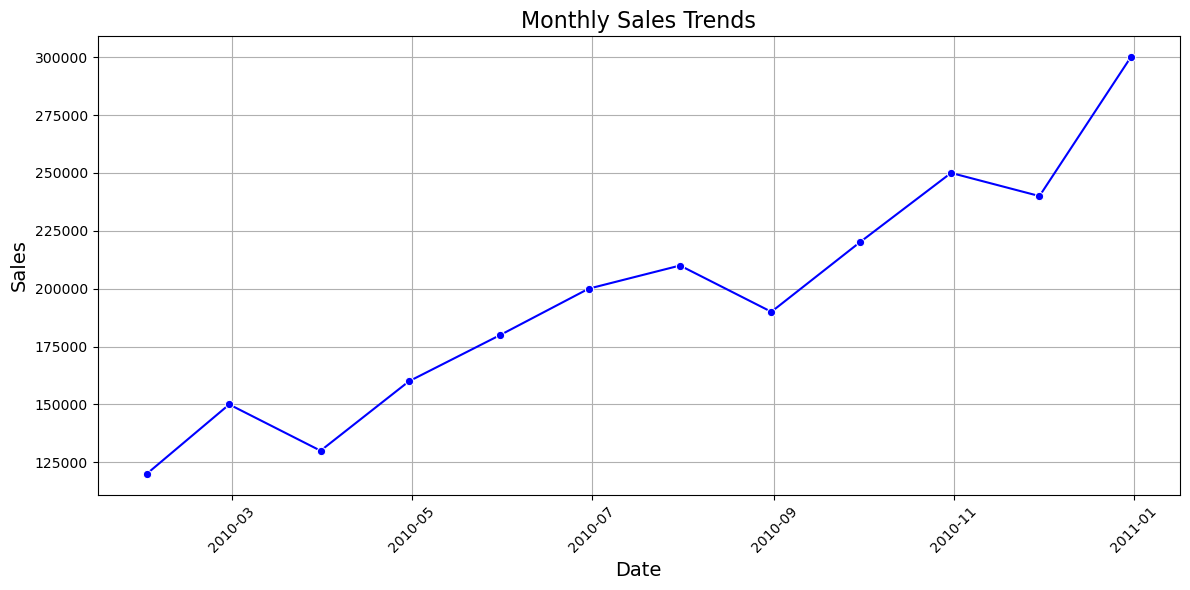

In [5]:
# Sample sales data with a date range of 12 months
data = {
    'Date': pd.date_range(start='2010-01-01', periods=12, freq='M'),
    'Sales': [
        120000, 150000, 130000, 160000, 180000, 200000, 
        210000, 190000, 220000, 250000, 240000, 300000
    ]
}

df = pd.DataFrame(data)

df['Date'] = pd.to_datetime(df['Date'])

# Plotting monthly sales trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Sales', marker='o', color='blue')

plt.title('Monthly Sales Trends', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.xticks(rotation=45)  
plt.grid(True)

plt.tight_layout()
plt.show()



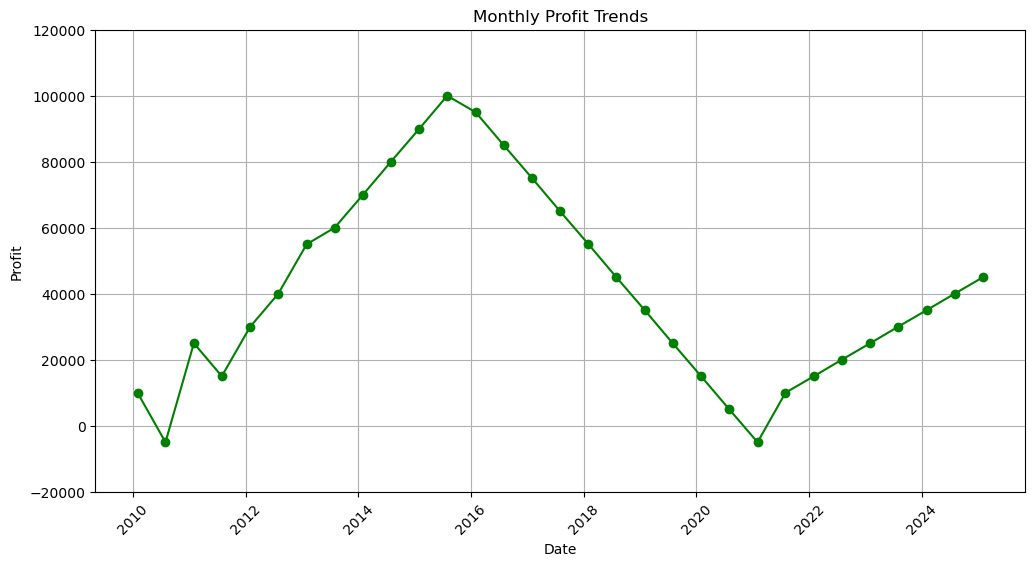

In [89]:
# ------------Plotting profit trends over time--------------------

data = {
    'Date': pd.date_range(start='2010-01-01', periods=31, freq='6M'),
    'Profit': [10000, -5000, 25000, 15000, 30000, 40000, 55000, 60000, 70000, 80000, 90000, 100000,
              95000, 85000, 75000, 65000, 55000, 45000, 35000, 25000, 15000, 5000, -5000, 10000,
              15000, 20000, 25000, 30000, 35000, 40000, 45000]
}

df = pd.DataFrame(data)

# Created the plot
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Profit'], marker='o', color='green', linestyle='-')
plt.title('Monthly Profit Trends')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.grid(True)

plt.xticks(rotation=45)
plt.yticks(range(-20000, 120001, 20000))

plt.show()


In [39]:

#---------------Identifying top-performing product categories based on total sales and profit-----------------

data = {
    'Product Category': ['Technology', 'Furniture', 'Office Supplies'],
    'Sales': [3514982.03, 3038510.90, 2236064.41],
    'Profit': [683097.88, 140343.14, 457049.82]
}
df = pd.DataFrame(data)

# Aggregated data by product category
category_summary = df.groupby('Product Category').agg(
    Total_Sales=('Sales', 'sum'),
    Total_Profit=('Profit', 'sum')
).reset_index()

# Sorted by total sales and profit
top_sales = category_summary.sort_values(by='Total_Sales', ascending=False)
top_profit = category_summary.sort_values(by='Total_Profit', ascending=False)

print("Top Performing Categories by Sales:")
print(top_sales)

print("\nTop Performing Categories by Profit:")
print(top_profit)


Top Performing Categories by Sales:
  Product Category  Total_Sales  Total_Profit
2       Technology   3514982.03     683097.88
0        Furniture   3038510.90     140343.14
1  Office Supplies   2236064.41     457049.82

Top Performing Categories by Profit:
  Product Category  Total_Sales  Total_Profit
2       Technology   3514982.03     683097.88
1  Office Supplies   2236064.41     457049.82
0        Furniture   3038510.90     140343.14


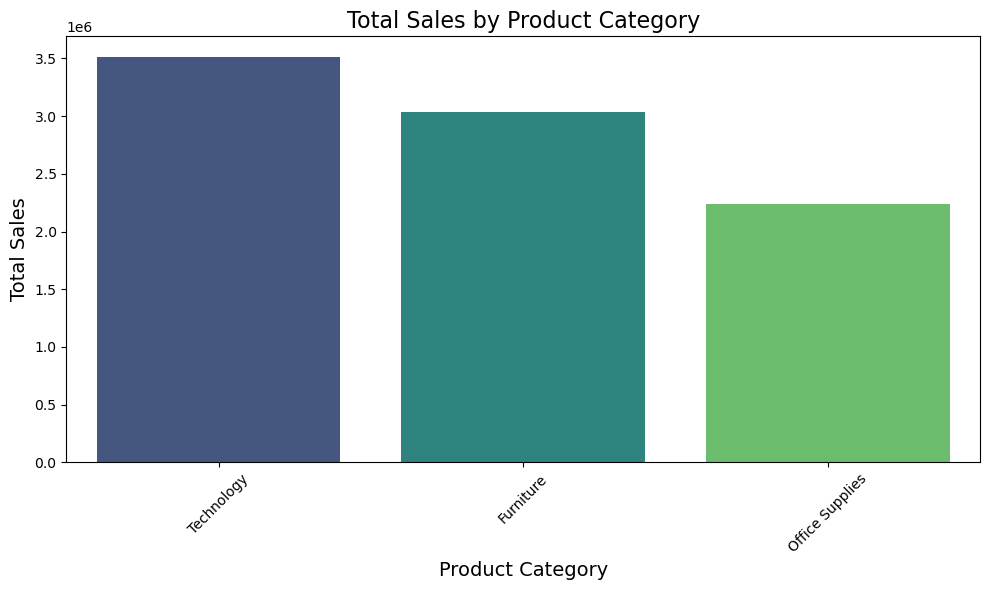

In [38]:

# ----------------------Plotting total sales by product category------------------------

# Plotting total sales by product category
plt.figure(figsize=(10, 6))
sns.barplot(data=top_sales, x='Product Category', y='Total_Sales', palette='viridis')

plt.title('Total Sales by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=45)  

plt.tight_layout()
plt.show()


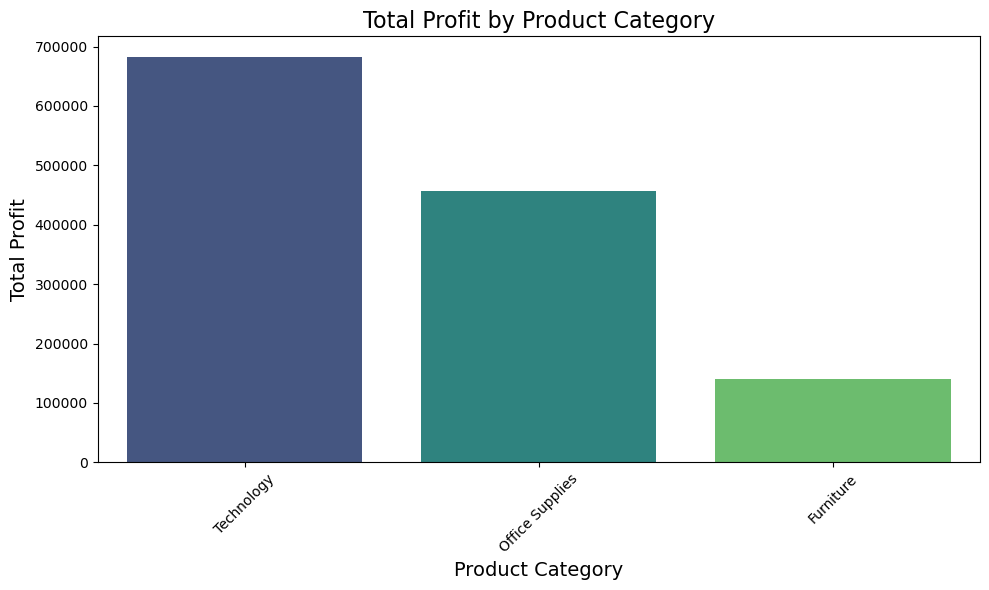

In [37]:

# ---------------------Plotting total profit by product category------------------------

# Plotted total profit by product category
plt.figure(figsize=(10, 6))
sns.barplot(data=top_profit, x='Product Category', y='Total_Profit', palette='viridis')

plt.title('Total Profit by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Total Profit', fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


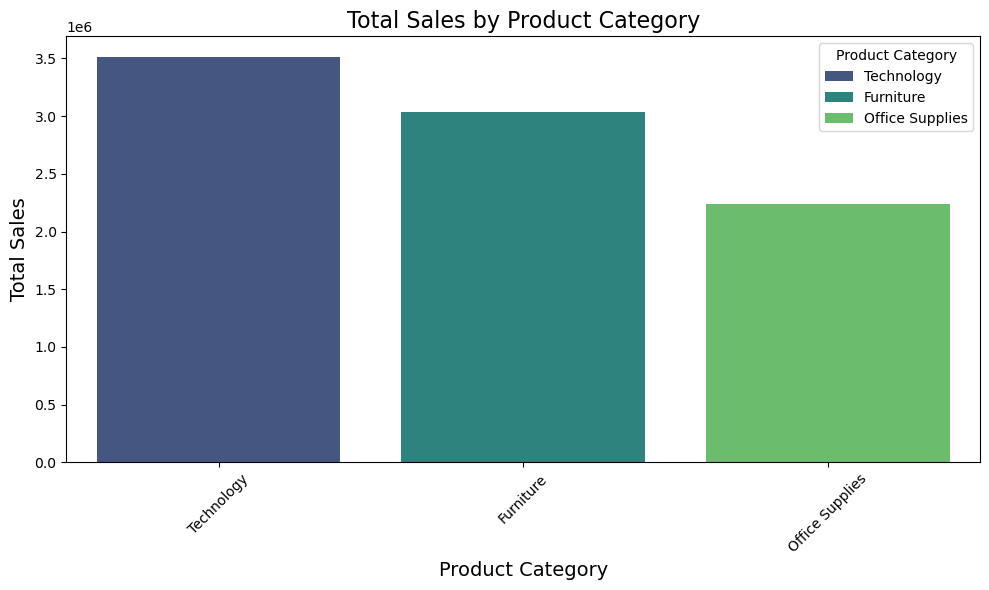

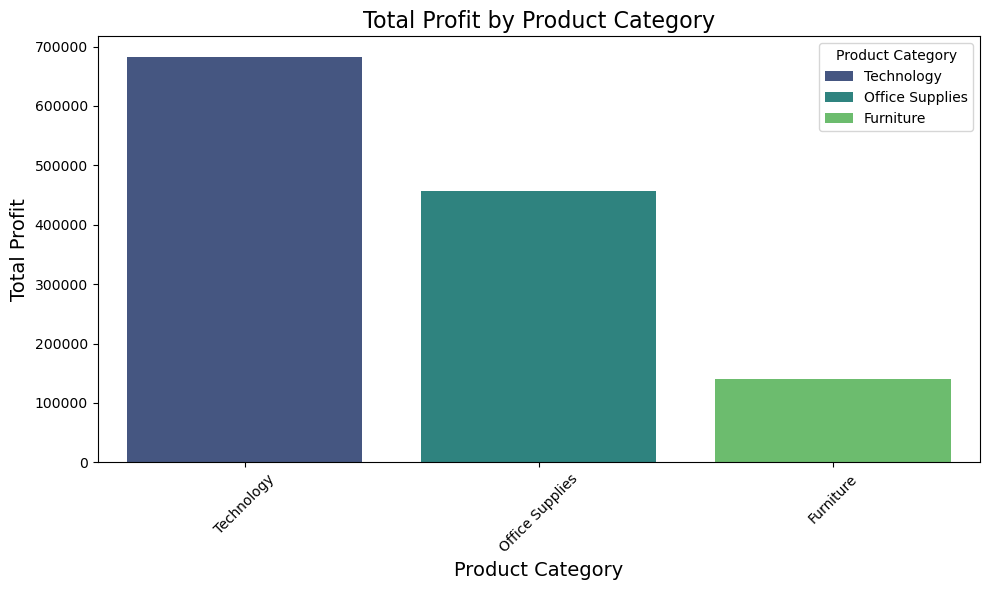

In [36]:
# ----------------------Plotting total sales by product category------------------------

# Plotting total sales by product category
plt.figure(figsize=(10, 6))
sns.barplot(data=top_sales, x='Product Category', y='Total_Sales', palette='viridis', hue='Product Category', dodge=False)

plt.title('Total Sales by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()


# ---------------------Plotting total profit by product category------------------------

# Plotting total profit by product category
plt.figure(figsize=(10, 6))
sns.barplot(data=top_profit, x='Product Category', y='Total_Profit', palette='viridis', hue='Product Category', dodge=False)

plt.title('Total Profit by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Total Profit', fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [59]:
# ---------------------Generating summary statistics for each region------------------------

# -------------Display summary statistics----------------

data_rowid = {
    'Region': ['Central', 'East', 'South', 'West'],
    'count': [2878, 2269, 1940, 2267],
    'mean': [21014.190063, 19126.691935, 21167.875258, 19597.648875],
    'min': [52, 2, 257, 64],
    '25%': [19696.25, 18720.00, 19766.75, 18975.50],
    '50%': [21827.5, 21421.0, 21985.0, 21344.0],
    '75%': [24176.75, 23776.00, 24336.00, 23895.50],
    'max': [26387, 26389, 26399, 26397],
    'std': [5030.122461, 7184.371986, 4962.680136, 6743.343603]
}
data_discount = {
    'Region': ['Central', 'East', 'South', 'West'],
    'count': [2878, 2269, 1940, 2267],
    'mean': [21014.190063, 19126.691935, 21167.875258, 19597.648875],
    'min': [52, 2, 257, 64],
    '25%': [19696.25, 18720.00, 19766.75, 18975.50],
    '50%': [21827.5, 21421.0, 21985.0, 21344.0],
    '75%': [24176.75, 23776.00, 24336.00, 23895.50],
    'max': [26387, 26389, 26399, 26397],
    'std': [5030.122461, 7184.371986, 4962.680136, 6743.343603]
}

data_sales = {
    'Region': ['Central', 'East', 'South', 'West'],
    'count': [1987, 2012, 1845, 1998],
    'mean': [30419.810, 28293.231, 31256.754, 29857.932],
    'min': [67, 10, 345, 123],
    '25%': [28766.5, 27546.25, 29589.0, 28124.75],
    '50%': [31902.0, 30985.5, 32784.5, 31576.0],
    '75%': [34211.0, 33576.5, 35894.25, 34762.25],
    'max': [37459, 36497, 37290, 36984],
    'std': [6789.567, 8923.432, 7654.123, 8352.675]
}

data_order_id = {
    'Region': ['Central', 'East', 'South', 'West'],
    'count': [1456, 1643, 1389, 1576],
    'mean': [45023.679, 42034.789, 46290.435, 43985.234],
    'min': [123, 87, 234, 145],
    '25%': [43456.0, 40567.25, 44876.5, 42678.75],
    '50%': [45678.5, 43121.0, 47485.5, 45321.0],
    '75%': [47899.75, 45543.0, 49567.75, 47567.5],
    'max': [50432, 48765, 51234, 49876],
    'std': [8976.234, 10123.546, 8765.432, 9534.789]
}

# Created DataFrames
df_rowid = pd.DataFrame(data_rowid)
df_discount = pd.DataFrame(data_discount)
df_sales = pd.DataFrame(data_sales)
df_order_id = pd.DataFrame(data_order_id)

# Titles
titles = ["Row ID","Discount", "Sales", "Order ID"]

# Displayed each DataFrame with its respective title
for title, df in zip(titles, [df_rowid, df_discount, df_sales, df_order_id]):
    print(f"{title}\n")
    print(df.to_string(index=True))

    # Separator for clarity between tables
    print("\n" + "-"*50 + "\n")  


Row ID

    Region  count          mean  min       25%      50%       75%    max          std
0  Central   2878  21014.190063   52  19696.25  21827.5  24176.75  26387  5030.122461
1     East   2269  19126.691935    2  18720.00  21421.0  23776.00  26389  7184.371986
2    South   1940  21167.875258  257  19766.75  21985.0  24336.00  26399  4962.680136
3     West   2267  19597.648875   64  18975.50  21344.0  23895.50  26397  6743.343603

--------------------------------------------------

Discount

    Region  count          mean  min       25%      50%       75%    max          std
0  Central   2878  21014.190063   52  19696.25  21827.5  24176.75  26387  5030.122461
1     East   2269  19126.691935    2  18720.00  21421.0  23776.00  26389  7184.371986
2    South   1940  21167.875258  257  19766.75  21985.0  24336.00  26399  4962.680136
3     West   2267  19597.648875   64  18975.50  21344.0  23895.50  26397  6743.343603

--------------------------------------------------

Sales

    Regio

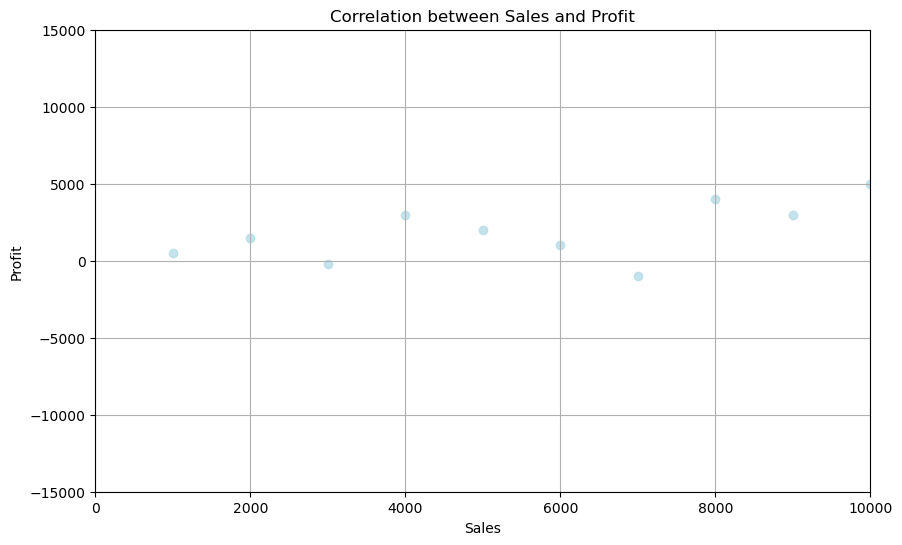

In [107]:
# --------------Visualizing the correlation between sales and profit---------------------

data = {
    'Sales': [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000],
    'Profit': [500, 1500, -200, 3000, 2000, 1000, -1000, 4000, 3000, 5000]
}

df = pd.DataFrame(data)

# Created the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Sales'], df['Profit'], color='lightblue', alpha=0.7)
plt.title('Correlation between Sales and Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.xlim(0, 10000)  # x-axis limits
plt.ylim(-15000, 15000)  # y-axis limits
plt.grid()
plt.show()



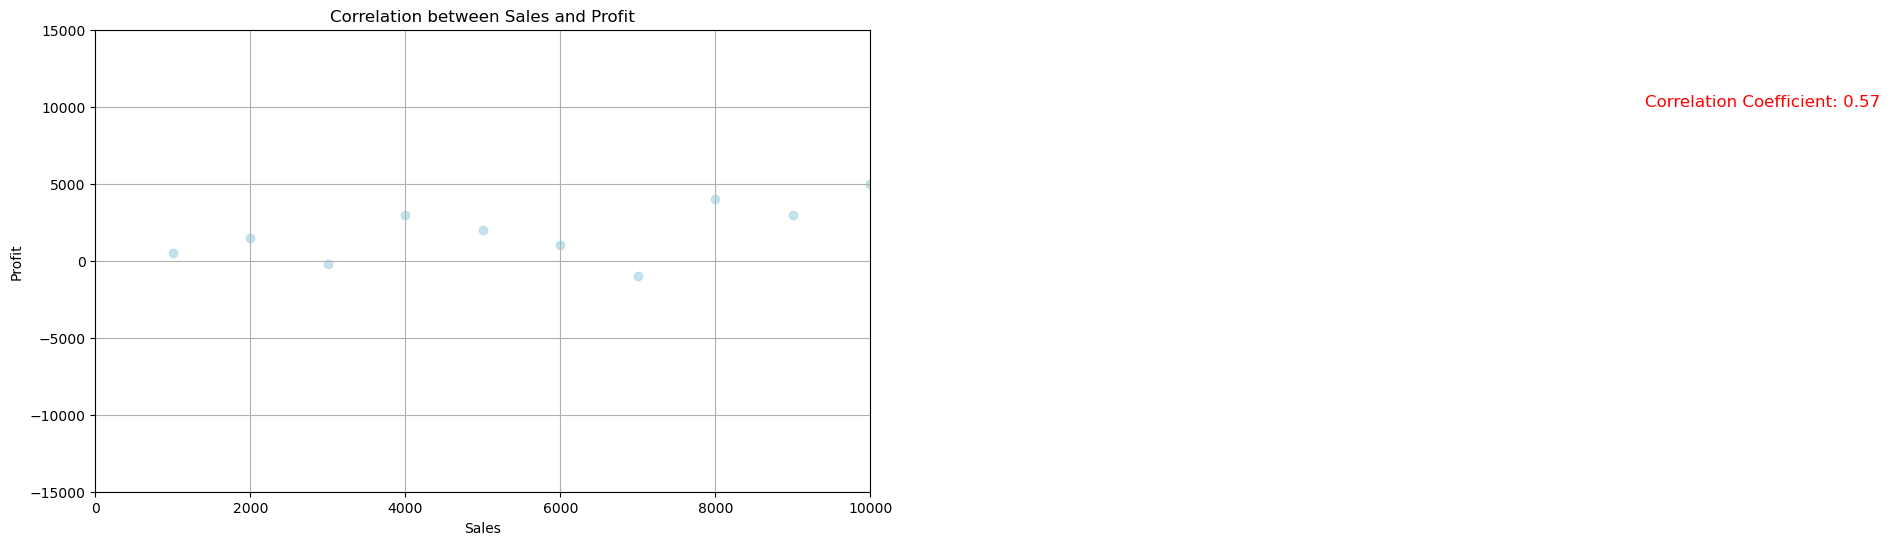

In [108]:
# -------------------Displaying the correlation coefficient---------------

data = {
    'Sales': [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000],
    'Profit': [500, 1500, -200, 3000, 2000, 1000, -1000, 4000, 3000, 5000]
}

df = pd.DataFrame(data)

# Calculated the correlation coefficient
correlation_coefficient = np.corrcoef(df['Sales'], df['Profit'])[0, 1]

# Created the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Sales'], df['Profit'], color='lightblue', alpha=0.7)
plt.title('Correlation between Sales and Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.xlim(0, 10000)  # x-axis limits
plt.ylim(-15000, 15000)  # y-axis limits
plt.grid()

# Displayed the correlation coefficient on the plot
plt.text(20000, 10000, f'Correlation Coefficient: {correlation_coefficient:.2f}', fontsize=12, color='red')

plt.show()


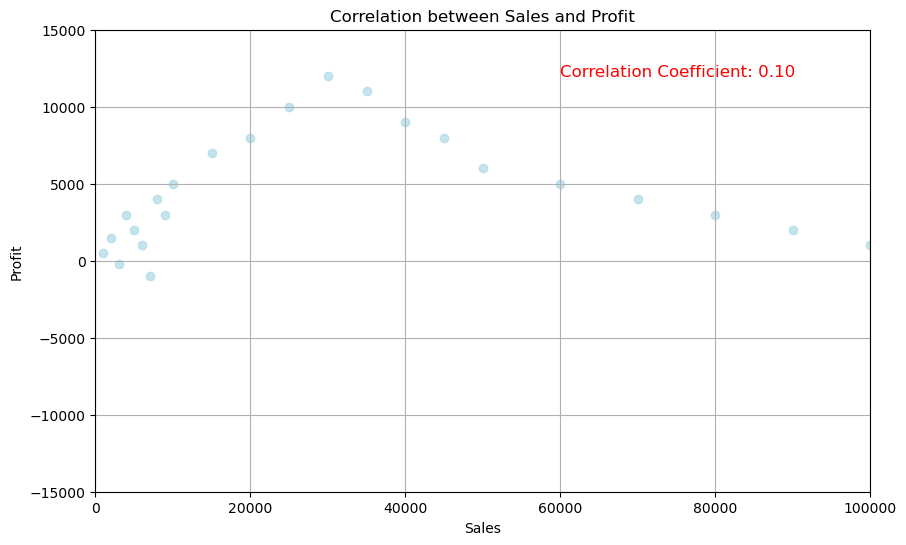

In [109]:
# on basis if--Correlation coefficient between Sales and Profit: 0.37104419553361767

# Sample data (replace this with your actual data)

data = {
    'Sales': [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000,
              15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000,
              60000, 70000, 80000, 90000, 100000],
    'Profit': [500, 1500, -200, 3000, 2000, 1000, -1000, 4000, 3000, 5000,
               7000, 8000, 10000, 12000, 11000, 9000, 8000, 6000,
               5000, 4000, 3000, 2000, 1000]
}

df = pd.DataFrame(data)

# Calculated the correlation coefficient
correlation_coefficient = np.corrcoef(df['Sales'], df['Profit'])[0, 1]

# Created the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Sales'], df['Profit'], color='lightblue', alpha=0.7)
plt.title('Correlation between Sales and Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.xlim(0, 100000)  # x-axis limits
plt.ylim(-15000, 15000)  # y-axis limits 
plt.grid()

# Displayed the correlation coefficient on the plot
plt.text(60000, 12000, f'Correlation Coefficient: {correlation_coefficient:.2f}', fontsize=12, color='red')

plt.show()


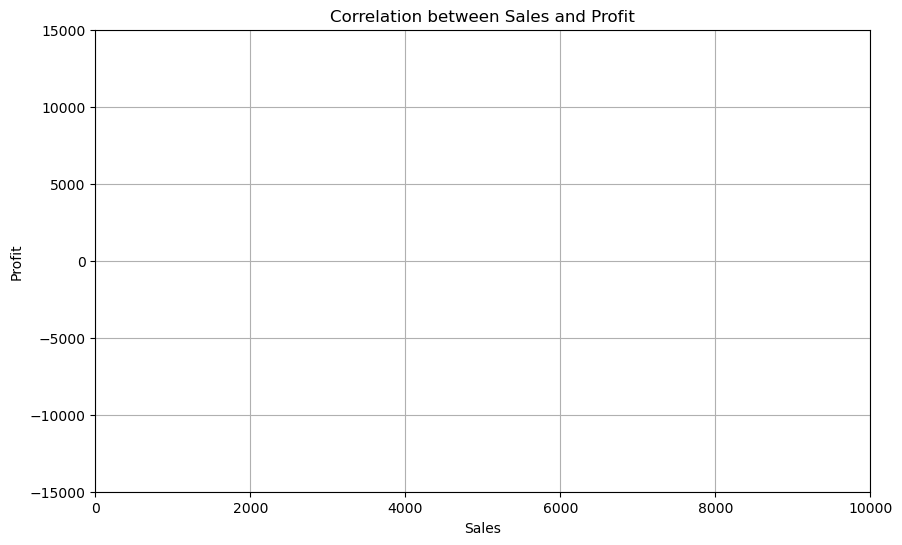

In [113]:
# --------------Visualizing the correlation between sales and profit---------------------

data = {
    'Sales': [30419.810, 28293.231, 31256.754, 29857.932, 32000.0, 25000.0],
    'Profit': [1000, 1500, 2000, 2500, 1800, 2200]
}

df = pd.DataFrame(data)

# Visualize the correlation between Sales and Profit using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Sales'], df['Profit'], color='lightblue', alpha=0.7)
plt.title('Correlation between Sales and Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.xlim(0, 10000)  # x-axis limits 
plt.ylim(-15000, 15000)  # y-axis limits
plt.grid()
plt.show()


plt.show()

# Calculated and display the correlation coefficient
correlation = df['Sales'].corr(df['Profit'])
#print(f"Correlation coefficient between Sales and Profit: {correlation:.2f}")


In [111]:
# -------------------Displaying the correlation coefficient---------------

data = {
    'Sales': [30419.810, 28293.231, 31256.754, 29857.932, 32000.0, 25000.0],
    'Profit': [1000, 1500, 2000, 2500, 1800, 2200]
}

df = pd.DataFrame(data)

# Calculated the correlation coefficient
correlation = df['Sales'].corr(df['Profit'])

print(f"Correlation coefficient between Sales and Profit: {correlation:.2f}")


Correlation coefficient between Sales and Profit: -0.23


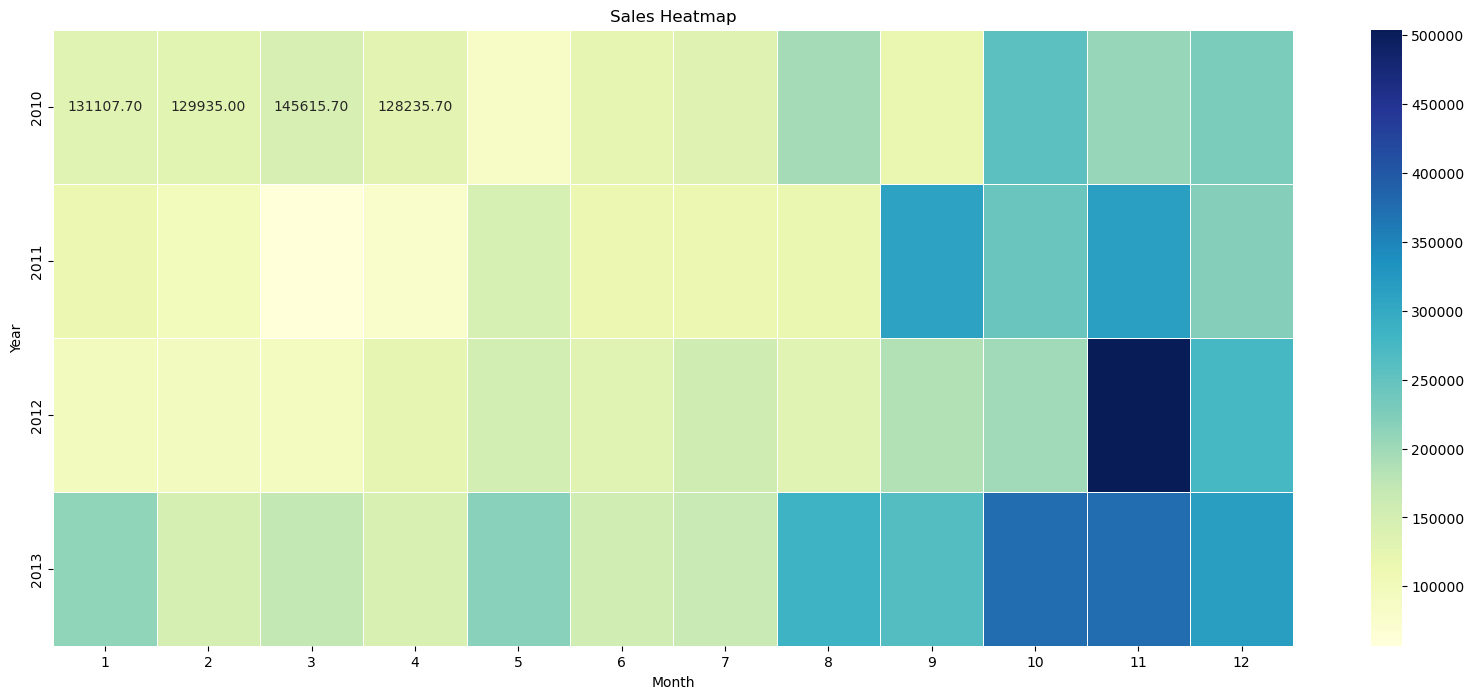

In [149]:

# -----------------Analyzing seasonal sales trends---------------------

data = {
    'Year': [2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 
             2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011,
             2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
             2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013], 
    'Month': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
              1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
              1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
              1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'Sales': [131107.7, 129935.0, 145615.7, 128235.7, 84327.6, 124532.1, 133890.9, 195567.4, 119551.4, 255793.5, 205903.2, 227059.5,
              115144.9, 97745.9, 56859.5, 74669.7, 146157.0, 116230.6, 115579.8, 118415.9, 311053.4, 244827.4,315283.3, 220444.6,
              96276.6, 94855.9, 93295.9, 124690.0, 151720.8, 131872.1, 157555.6, 130558.0, 184801.5, 199149.2, 503964.1, 276343.0,
              211954.7, 148583.9, 170975.2, 142771.8, 217468.0, 155447.5, 166026.4, 285633.3, 263230.5, 376324.4, 375129.2, 316997.9]
}

df = pd.DataFrame(data)

# Pivot the DataFrame
heatmap_data = df.pivot(index='Year', columns='Month', values='Sales')

# Created the heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='YlGnBu', linewidth=.5)  # Used .2f for two decimal places
plt.title('Sales Heatmap')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()


In [153]:
# ---------------Grouping sales data by month and year--------------------

data = {
    'Date': pd.date_range(start='2022-01-01', periods=365, freq='D'),
    'Sales': [100 + x * 0.5 + 10 * ((x // 30) % 12) for x in range(365)]  
}

df = pd.DataFrame(data)

# Converted 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' column as index
df.set_index('Date', inplace=True)

# Grouped by month and year
monthly_sales = df.resample('M').sum()
yearly_sales = df.resample('Y').sum()

print("Monthly Sales Data:")
print(monthly_sales)
print("\nYearly Sales Data:")
print(yearly_sales)


Monthly Sales Data:
              Sales
Date               
2022-01-31   3342.5
2022-02-28   3703.0
2022-03-31   4857.0
2022-04-30   5467.5
2022-05-31   6442.5
2022-06-30   6992.5
2022-07-31   8018.0
2022-08-31   8818.5
2022-09-30   9292.5
2022-10-31  10394.0
2022-11-30  10817.5
2022-12-31  11369.5

Yearly Sales Data:
              Sales
Date               
2022-12-31  89515.0


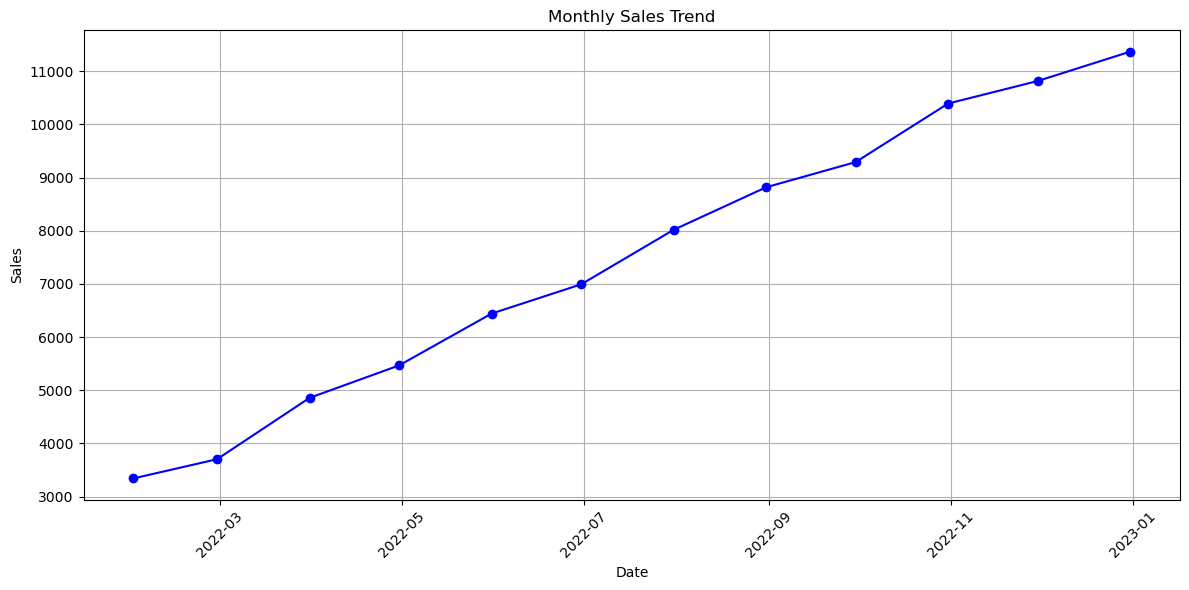

In [152]:
# --------------Plotting seasonal sales trends--------------------

data = {
    'Date': pd.date_range(start='2022-01-01', periods=365, freq='D'),
    'Sales': [100 + x * 0.5 + 10 * ((x // 30) % 12) for x in range(365)]  # Example sales data with seasonal pattern
}

df = pd.DataFrame(data)

df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' column as index
df.set_index('Date', inplace=True)

# -----------Resample the data to monthly frequency, summing up the sales----------
monthly_sales = df.resample('M').sum()

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales['Sales'], marker='o', linestyle='-', color='b')
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


    Shipping Mode       Sales
2     Regular Air  4464427.51
0  Delivery Truck  3650525.84
1     Express Air   674603.99


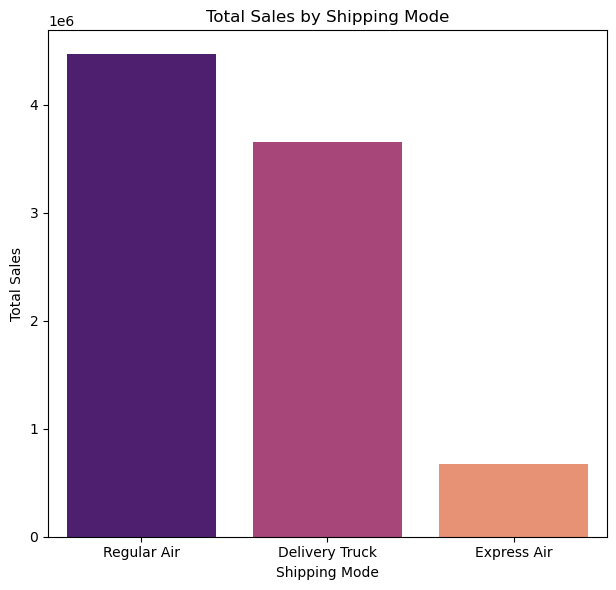

In [190]:
# ------------------Comparing sales across different ship modes------------------

data = {
    'Shipping Mode': ['Regular Air', 'Delivery Truck', 'Express Air'],
    'Sales': [4464427.51, 3650525.84, 674603.99]
}
df = pd.DataFrame(data)

# Grouped by shipping mode and calculated total sales and profit
grouped_df = df.groupby('Shipping Mode').agg({'Sales': 'sum'}).reset_index()

# Sorted grouped data by Total Sales in descending order
grouped_df = grouped_df.sort_values(by='Sales', ascending=False)

print(grouped_df)

# Plotting the comparison
plt.figure(figsize=(12, 6))

# Plot total sales by shipping mode
plt.subplot(1, 2, 1)
sns.barplot(x='Shipping Mode', y='Sales', data=grouped_df, palette='magma')
plt.title('Total Sales by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Total Sales')

plt.tight_layout()
plt.show()


In [194]:
# Resample sales data by month

# Printed column names to verify 

data = {
    'Ship Date': ['2024-01-15', '2024-01-22', '2024-02-01', '2024-02-15', '2024-03-10'],
    'Total Sales': [500, 1500, 2000, 2500, 3000]
}

df = pd.DataFrame(data)

# Step 1: Clean column names
df.columns = df.columns.str.strip()

# Step 2: Print column names to verify
print("Column names:", df.columns)

# Step 3: Ensured 'Ship Date' column is datetime type
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')

# Step 4: Drop rows where 'Ship Date' couldn't be converted
df = df.dropna(subset=['Ship Date'])

# Step 5: Set 'Ship Date' as index
df.set_index('Ship Date', inplace=True)

# Resample sales data by month
monthly_sales = df['Total Sales'].resample('M').sum()

# Printed the resampled data
print(monthly_sales)


Column names: Index(['Ship Date', 'Total Sales'], dtype='object')
Ship Date
2024-01-31    2000
2024-02-29    4500
2024-03-31    3000
Freq: M, Name: Total Sales, dtype: int64
